# Exploratory Data Analysis (EDA) for Uganda Budget Allocations (FY 2015/16 - 2021/22)
This notebook analyzes sector-level budget allocations to identify funding patterns, trends, and anomalies. Visualizations include:
    - Line chart: Sector allocations over time.
    - Pie chart: Budget share by sector for FY 2021/22.
    - Bar chart: Year-on-year percentage changes in allocations.
    - Box plot: Distribution of allocations to detect outliers.

# Exploratory Data Analysis (EDA) for Uganda Budget Allocations (FY 2015/16 - 2021/22)
This notebook analyzes sector-level budget allocations to identify funding patterns, trends, and anomalies. Visualizations include:
    - Line chart: Sector allocations over time.
    - Pie chart: Budget share by sector for FY 2021/22.
    - Bar chart: Year-on-year percentage changes in allocations.
    - Box plot: Distribution of allocations to detect outliers.
   

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

    
# Load cleaned dataset
df = pd.read_csv('/workspaces/uganda-budget-analysis/uganda_budget_cleaned.csv')


In [89]:
print(df.columns)

Index(['FinancialYear', 'Sector', 'Approved Budget'], dtype='object')


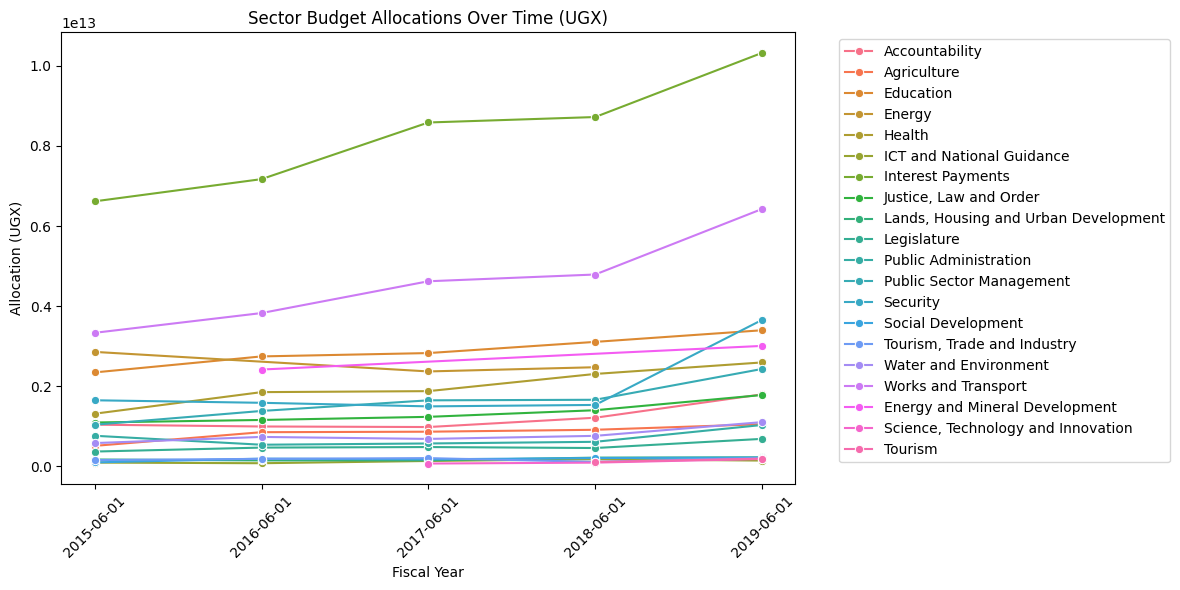

In [90]:
# Convert FinancialYear to string for plotting
df['FinancialYear'] = df['FinancialYear'].astype(str)

# Line chart: Allocations over time by sector
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='FinancialYear', y='Approved Budget', hue='Sector', marker='o')
plt.title('Sector Budget Allocations Over Time (UGX)')
plt.xlabel('Fiscal Year')
plt.ylabel('Allocation (UGX)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/sector_trends.png')
plt.show()

 

In [91]:
#import nbformat
#print(nbformat.__version__)

In [92]:
import IPython
print(IPython.__version__)

9.4.0


In [93]:
import sys
print(sys.executable)


/workspaces/uganda-budget-analysis/.venv/bin/python


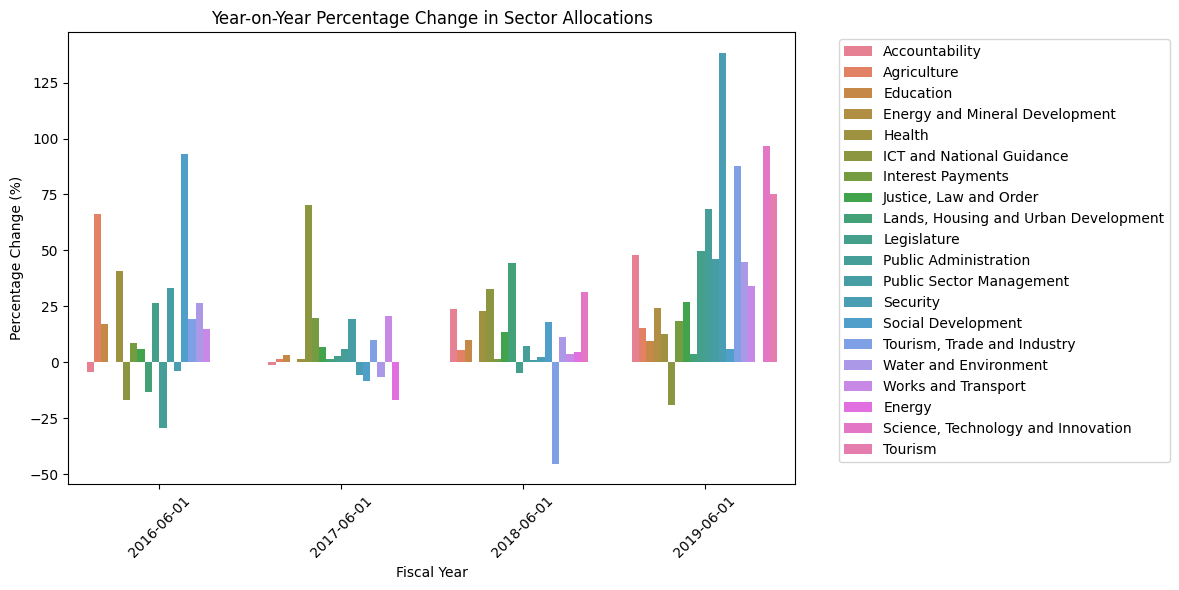

In [94]:
   # Bar chart: Year-on-year change
df['YoY_Change'] = df.groupby('Sector')['Approved Budget'].pct_change() * 100
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['FinancialYear'] != '2015-06-01'], x='FinancialYear', y='YoY_Change', hue='Sector')
plt.title('Year-on-Year Percentage Change in Sector Allocations')
plt.xlabel('Fiscal Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/yoy_change.png')
plt.show()


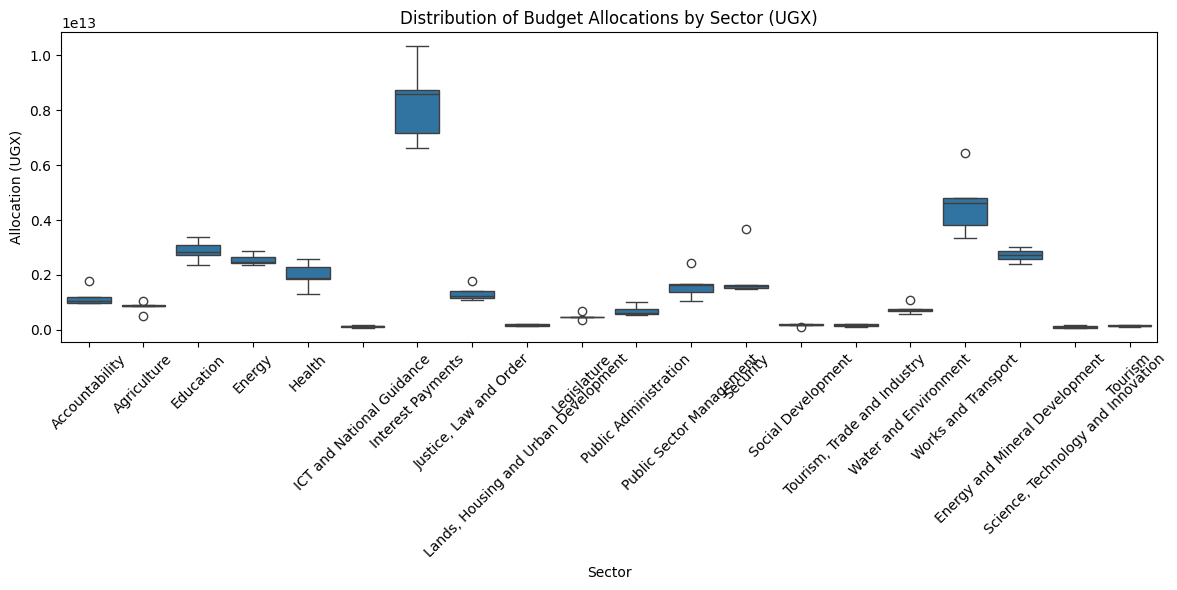

In [95]:
# Box plot: Allocation distribution\n",
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sector', y='Approved Budget')
plt.title('Distribution of Budget Allocations by Sector (UGX)')
plt.xlabel('Sector')
plt.ylabel('Allocation (UGX)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/workspaces/uganda-budget-analysis/sector_distribution.png')
plt.show()

In [96]:
import plotly.express as px
df_2021 = pd.read_excel('/workspaces/uganda-budget-analysis/budget_datasets/budget_fy_21_22.xlsx')
print(df_2021.columns)

Index(['Year', 'SourceOfFunding', 'Category', 'SectorCode', 'SectorName',
       'VoteCode', 'VoteName', 'ProgramCode', 'ProgrammeName',
       'SubProgramCode', 'SubProgramName', 'KeyOutputCode',
       'KeyOutputDescription', 'ItemCode', 'Description', 'ClassificationCode',
       'ClassificationName', 'OutputClassCode', 'OutputClassName', 'Amount',
       'Quarter', 'Expr1'],
      dtype='object')


In [97]:
# Rename columns
df_2021 = df_2021.rename(columns={
        'SectorName': 'Sector',
        'Year': 'FinancialYear',
        'Amount': 'Approved Budget'
    })
print(df_2021.columns)

Index(['FinancialYear', 'SourceOfFunding', 'Category', 'SectorCode', 'Sector',
       'VoteCode', 'VoteName', 'ProgramCode', 'ProgrammeName',
       'SubProgramCode', 'SubProgramName', 'KeyOutputCode',
       'KeyOutputDescription', 'ItemCode', 'Description', 'ClassificationCode',
       'ClassificationName', 'OutputClassCode', 'OutputClassName',
       'Approved Budget', 'Quarter', 'Expr1'],
      dtype='object')


In [98]:
# Sort the DataFrame by Approved Budget descending for better visualization
df_2122 = df_2122.sort_values('Approved Budget', ascending=False).reset_index(drop=True)
    
    # Dynamically create pull list to explode the largest sector
pull = [0.1 if i == 0 else 0 for i in range(len(df_2122))]
    
fig = px.pie(df_2122, values='Approved Budget', names='Sector', 
                 title='FY 2021/22 Budget Allocation by Sector',
                 labels={'Approved Budget': 'Allocation (UGX)'},
                 hover_data=['Approved Budget'],
                 color_discrete_sequence=px.colors.sequential.Viridis)  # Added a color scheme for better visuals
fig.update_traces(textinfo='percent+label', pull=pull,
                      hovertemplate='%{label}: %{value:,.0f} UGX (%{percent})')  # Improved hover format
    
    # Write to HTML in current directory to avoid path issues
fig.write_html('sector_pie_2122.html')
    
fig.show()

In [99]:
print(df_2122.shape, df_2122.dtypes, df_2122.head())

(21983, 22) FinancialYear            object
SourceOfFunding          object
Category                 object
SectorCode                int64
Sector                   object
VoteCode                  int64
VoteName                 object
ProgramCode               int64
ProgrammeName            object
SubProgramCode            int64
SubProgramName           object
KeyOutputCode             int64
KeyOutputDescription     object
ItemCode                  int64
Description              object
ClassificationCode        int64
ClassificationName       object
OutputClassCode           int64
OutputClassName          object
Approved Budget         float64
Quarter                  object
Expr1                    object
dtype: object   FinancialYear SourceOfFunding  Category  SectorCode             Sector  \
0     2021-2022         NonWage  Approved          17  Interest Payments   
1     2021-2022         NonWage  Approved          17  Interest Payments   
2     2021-2022          GouDev  Approved 

In [100]:
df_2122.describe()


,SectorCode,VoteCode,ProgramCode,SubProgramCode,KeyOutputCode,ItemCode,ClassificationCode,OutputClassCode,Approved Budget
count,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,2.198300e+04
mean,9.349952,114.264432,29.262567,293.566210,9.595733,227864.037847,227.826457,1.134559,1.931802e+09
std,4.838615,94.530765,22.012737,589.027468,18.846330,22448.710266,22.397813,0.502382,5.498264e+10
min,1.000000,1.000000,1.000000,1.000000,0.000000,211101.000000,211.000000,1.000000,9.000000e-03
25%,7.000000,17.000000,7.000000,1.000000,1.000000,221003.000000,221.000000,1.000000,1.000000e+07
50%,8.000000,125.000000,24.000000,6.000000,3.000000,222001.000000,222.000000,1.000000,4.000000e+07
75%,13.000000,164.000000,52.000000,20.000000,6.000000,227001.000000,227.000000,1.000000,1.700000e+08
max,20.000000,500.000000,84.000000,1763.000000,99.000000,321617.000000,321.000000,4.000000,6.485528e+12


In [101]:
print(df_2122['FinancialYear'].unique())

['2021-2022']
